In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [24]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [32]:
# Histograms for numerical features

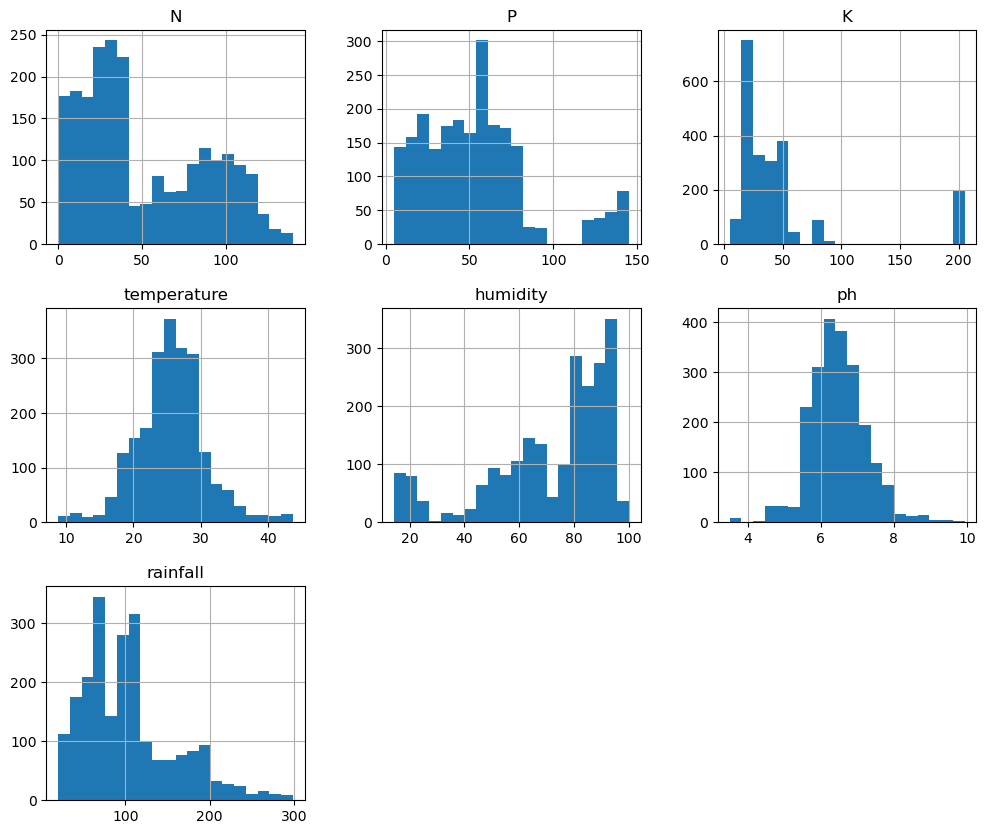

In [26]:
df.hist(bins=20, figsize=(12, 10))
plt.show()

In [33]:
# Box plots for numerical features

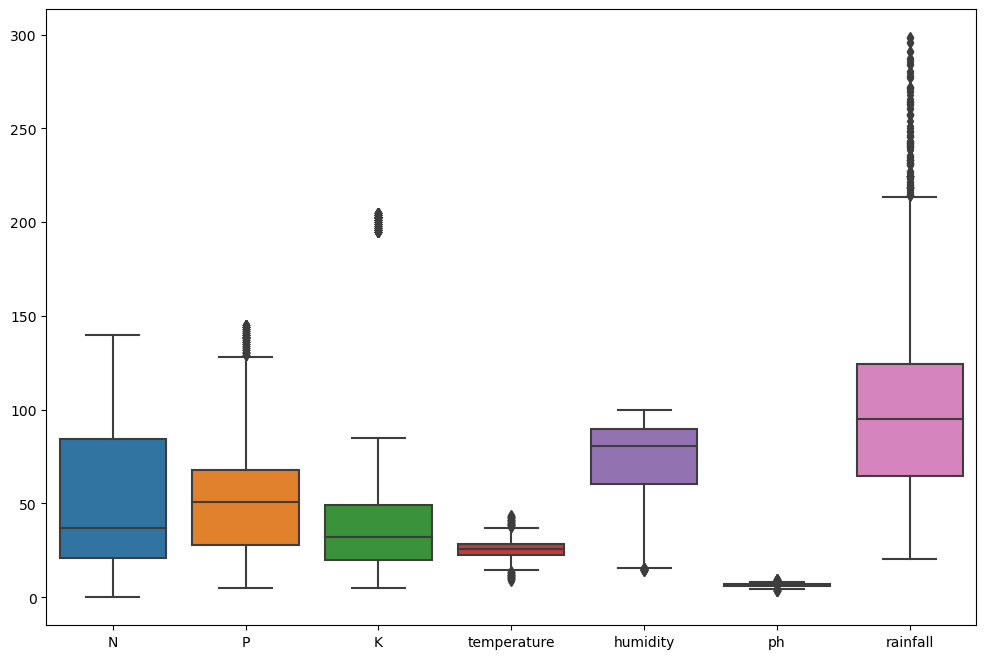

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

In [34]:
# Correlation heatmap

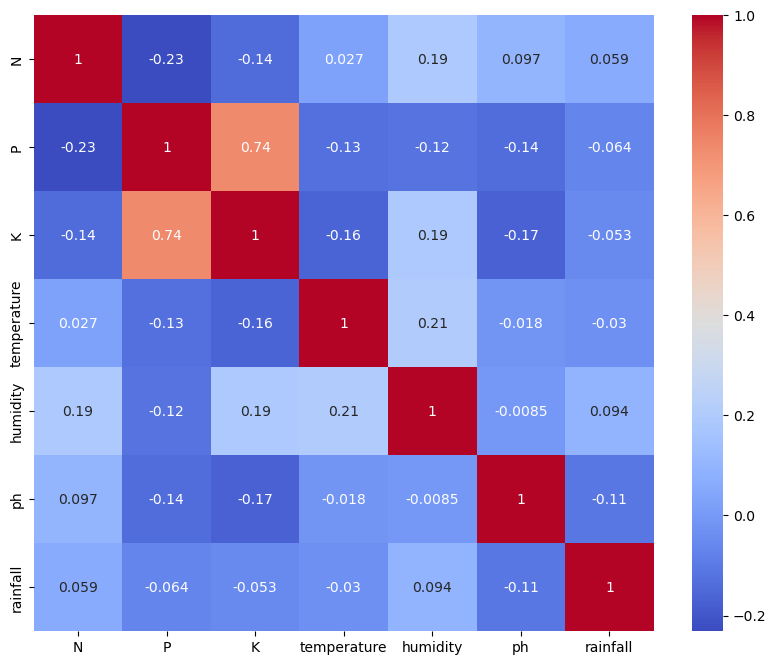

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [35]:
# Scatter plot for two numerical features

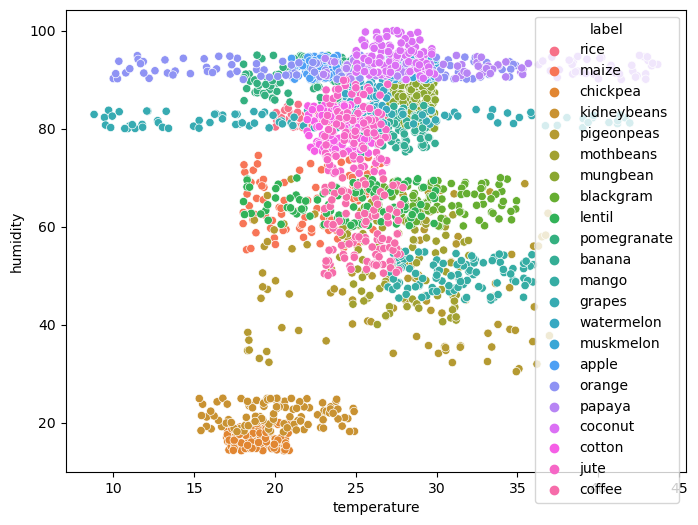

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df)
plt.show()

In [39]:
# Distribution plot (Kernel Density Estimation - KDE)

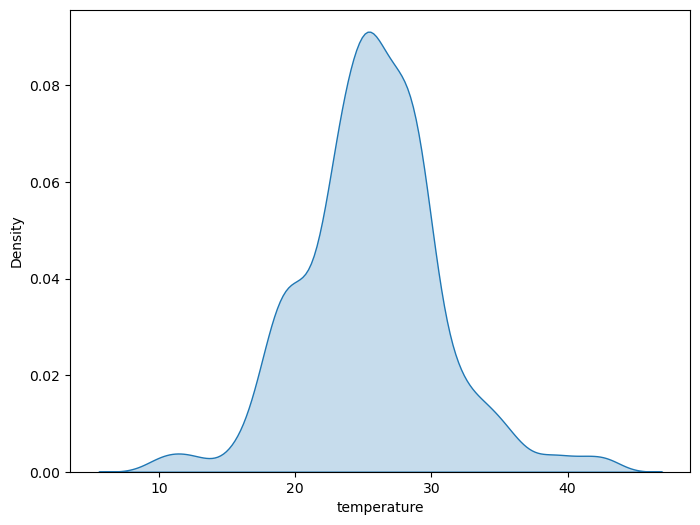

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['temperature'], fill=True)
plt.show()

In [40]:
#spliting the Dataset

In [8]:
x = df.drop('label', axis = 1)
y = df['label']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9618181818181818


In [15]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.9781818181818182


In [16]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
naive_bayes_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of naive_bayes is " + str(naive_bayes_acc))

Accuracy of naive_bayes is 0.9945454545454545


In [17]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators = 25, random_state=2)
model_4.fit(x_train.values, y_train.values)
y_pred_4 = model_4.predict(x_test)
random_fore_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy of Random Forest is " + str(random_fore_acc))

Accuracy of Random Forest is 0.9945454545454545


In [3]:
import pickle


In [19]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_4, file)

In [20]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

RandomForestClassifier(n_estimators=25, random_state=2)

In [21]:
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = Pickled_Model.predict(arr)

In [22]:
print(acc)

['rice']


In [6]:
Pickled_Model = pickle.load(open("Pickle_RL_Model-Copy1.pkl", 'rb'))

Pickled_Model

RandomForestClassifier(n_estimators=25, random_state=2)